In [7]:
rm(list = ls())
library(tidyverse)
library(readxl)
library(dplyr)
library(ggplot2)
setwd("C:/Users/rohan/Jupyter Projects/MSEF/Clustering Workspace/")
#dat <- read.table("distanceMatrix3.txt", header = T, sep = ",",row.names = 1)
dist <- read.table("Out_distanceMatrix.txt", header = T, sep = ",",row.names = 1)
wordct <- read.table("Out_wordCountMatrix.txt", header = T, sep = ",",row.names = 1)
matchct <- read.table("Out_matchCountMatrix.txt", header = T, sep = ",",row.names = 1)

msef <- read_excel("MSEF_data2_20210907.xlsx", sheet = "ParticipantLevel", na = "NA")
# msef <- as.data.frame(msef[,c(1,3)])
msef <- as.data.frame(msef)

In [8]:
head(msef)

sno,Year,Title,clean Title + Ontology Terms,uniq_project_title,ProjectID3,uniqProjectID,multischool_project,ProjectApproach,OnotologyTerms,...,American_Indian%,Pacific_Islander%,Two_or_more_races%,WhitePercInMSEF,BlackPercInMSEF,HispanicPercInMSEF,AsianPercInMSEF,SchoolDiversity,MSEFDiversity,DeviationEthnicityRep
23,2014,"A New Method for Identifying Active Regulatory DNA Elements, Phase II","a new method for identifying active regulatory dna elements, phase ii genetic,method genetics funda biology",1,1,1,NA,m,"genetic,method",...,NA,NA,NA,0.6907216,0.000000000,0.00000000,0.1340206,NA,-0.2279738,NA
1134,2017,"Actively Growing Hydroponics with Salt Water, Electricity-Free","actively growing hydroponics with sodium chloride water, electricity free chemical,chemical,method,agriculture,water biology agriculture environment",1,2,1,NA,m,"chemical,chemical,method,agriculture,water",...,0.001,0.000,0.053,0.2339181,0.005847953,0.00000000,0.5906433,-0.4878019,-0.2957110,0.1133163
2256,2020,"Air Pressure, Friction, and the Motion of Objects","air pressure, friction, and the motion of objects aerodynamics physics funda Engineering",1,3,1,NA,a,aerodynamics,...,0.003,0.002,0.053,0.4000000,0.133333333,0.03333333,0.3000000,-0.5559626,-0.4819518,0.1575366
2792,2018,"Al, NaF, and C4H6O2 Impacts on Learning and Memory in D. melanogaster","al, naf, and c4h6o2 impacts on learning and memory in d.melanogaster behaviour,chemical,chemical,alcohol,chemical,metal, inorganic,neuroscience, behaviour,organism,insect, fruitfly, drosophila chemistry behaviour biology",1,4,1,NA,a,"behaviour,chemical,chemical,alcohol,chemical,metal, inorganic,neuroscience, behaviour,organism,insect, fruitfly, drosophila",...,NA,NA,NA,0.0000000,0.000000000,0.00000000,0.0000000,NA,NA,NA
2793,2015,"Aluminum, Gasoline, and Your Brain","aluminum, gasoline, and your brain chemical,metal, inorganic,energy,organ,neuroscience, toxin chemistry medical BehavioralAndSocial",1,5,1,NA,a,"chemical,metal, inorganic,energy,organ,neuroscience, toxin",...,NA,NA,NA,0.0000000,0.000000000,0.00000000,0.0000000,NA,NA,NA
2704,2021,"Automated Detection of Stereotypic Behaviors, Their Characterization and Their Relation to Sensory Input and Cardiovascular Activity Using Wearable Sensors and ML/DL Techniques","automated detection of stereotypic behaviors, their characterization and their relation to sensory input and cardiovascular activity using wearable sensors and ml dl techniques device,organ, human compsci medical ComputerSci",1,6,1,NA,m,"device,organ, human",...,0.002,0.001,0.032,0.0952381,0.000000000,0.00000000,0.4761905,-0.4859208,-0.2506939,0.3015949


In [9]:
dim(dist)
dim(wordct)
dim(matchct)

[1] 2309 2309

[1] 2309 2309

[1] 2309 2309

In [10]:
fillLowerTri <- function(m){
    r <- dim(m)[1]
    c <- dim(m)[2]
    out = matrix(0, nrow = r, ncol = c)
    rownames(out) <- rownames(m)
    colnames(out) <- colnames(m)
    
    for (i in c(1:r)){
        for (j in c(1:c)){
            out[j,i] <- m[i,j]            
        }
    }
    return(out)
}

In [11]:
m <- as.matrix(dist)
m <- fillLowerTri(m)
range(m)
diag(m) = 0

m2 <- as.matrix(wordct)
m2 <- fillLowerTri(m2)
m2 <- m2/2
range(m2)

m3 <- as.matrix(matchct)
m3 <- fillLowerTri(m3)
range(m3)

#unmatchedWordCount
m4 <- m2 - m3
range(m4)
m4 <- m4+abs(min(m4))
m4 <- m4*m4
# m4 <- m4/max(m4)
which(m4[lower.tri(m4)] == 0)
range(m4)


#invert the distance matrix
m <- m*m
# m[which(m == 0)] = -1
range(m)
# m <- 1/m
# m[which(m == -1)] = 0
range(m)


m5 <- m - m4*0.01
m5[which(m4 == 0)] = 0
range(m5)
m5 = max(m5)-m5
range(m5)
# m5 = abs(m5)



[1]  0 28

[1]  0 28

[1]  0 28

[1] -3.0 24.5

[1]  818284 2640224

[1]   0.00 756.25

[1]   0 676

[1]   0 676

[1]  -7.29 675.96

[1]   0.00 683.25

In [12]:
d <- as.dist(m5)
h <- hclust(d)
tre <- as.dendrogram(h)

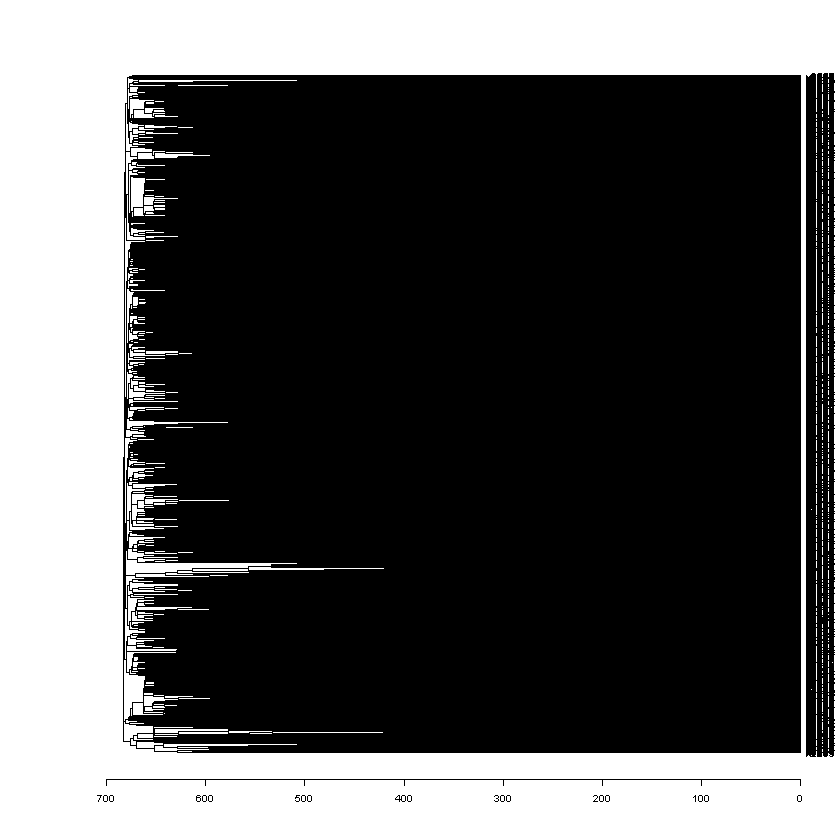

In [13]:
par(cex=0.5, mar=c(5, 8, 4, 1))
plot(tre, horiz = T)

In [14]:
labs <- rev(h$labels[h$order])
cat(labs, sep = "\n")
model <- paste("x", msef$sno, sep = "")
rownames(msef) <- model
msef <- cbind(msef, model)
clustord <- c(1:length(labs))
msef <- cbind(msef[labs,], clustord)
dim(msef)
colnames(msef)
# msef[labs,c(1,2)]
#msef <- cbind(msef, t)
cat(unlist(msef[labs,"Title"]), sep = "\n")

x2447
x1449
x303
x2895
x2393
x2547
x968
x2569
x2872
x1118
x2412
x2194
x1653
x1134
x972
x632
x2390
x2234
x186
x829
x2890
x804
x74
x1812
x1098
x2031
x1962
x2291
x2657
x1965
x2656
x208
x191
x2913
x228
x1045
x257
x1365
x1590
x1128
x2077
x2540
x2036
x727
x812
x2251
x233
x1124
x907
x394
x1383
x2454
x939
x2715
x2347
x552
x1146
x1400
x75
x696
x2757
x1729
x1190
x251
x1633
x639
x879
x2193
x1070
x2619
x1385
x478
x165
x38
x689
x2932
x2308
x2162
x1868
x1744
x177
x1720
x65
x1754
x723
x2758
x2289
x35
x81
x1703
x828
x1553
x161
x377
x2756
x209
x2658
x839
x1091
x2925
x1732
x1132
x2152
x2188
x2661
x2259
x1316
x1237
x175
x2074
x1413
x1163
x1602
x1478
x2107
x1564
x106
x309
x1773
x487
x1073
x1878
x852
x447
x2323
x1595
x1656
x801
x501
x381
x2681
x1543
x854
x2511
x2542
x2662
x388
x2433
x1893
x2777
x454
x848
x172
x2941
x249
x2919
x849
x824
x989
x2826
x43
x889
x2897
x2840
x2358
x2946
x2945
x1625
x1032
x1029
x1002
x1930
x788
x675
x2666
x1722
x2653
x1811
x299
x2138
x401
x392
x1905
x2849
x2445
x1358
x2197
x1
x1897

[1] 2309   71

[1] "sno"                              "Year"                            
 [3] "Title"                            "clean Title + Ontology Terms"    
 [5] "uniq_project_title"               "ProjectID3"                      
 [7] "uniqProjectID"                    "multischool_project"             
 [9] "ProjectApproach"                  "OnotologyTerms"                  
[11] "Field"                            "AppliedTo"                       
[13] "AppliedValue"                     "ProjectField"                    
[15] "Cancer"                           "AI_ML"                           
[17] "InfectiousDiseases_Covid"         "Water"                           
[19] "energy"                           "medical"                         
[21] "pollution"                        "Category"                        
[23] "SchoolName"                       "school_id"                       
[25] "school_region"                    "zip"                             
[27] "gender"                           "grade"                           
[29] "award"                            "awardvalue"                      
[31] "Ethnicity"                        "Race"                            
[33] "PerfBySchoolByYr"                 "RacePercBySchoolAllYears"        
[35] "TotalStudentParticipatedAllYears" "StudentsByYearBySchool"          
[37] "AllGender"                        "AllGrade"                        
[39] "AllEthnicity"                     "GenderComp"                      
[41] "AvgGrade"                         "EthnicityComp"                   
[43] "team_size"                        "award_value"                     
[45] "Total_awardValue"                 "TotalProjectFromSchoolAllYears"  
[47] "NumberOfYearsParticipated"        "2019Score"                       
[49] "2019SchoolRank"                   "2018Rank"                        
[51] "isCharter"                        "isTitle1"                        
[53] "NumStudents"                      "NumTeachers"                     
[55] "SpendingPerPupil"                 "White%"                          
[57] "Black%"                           "Hispanic%"                       
[59] "Asian%"                           "American_Indian%"                
[61] "Pacific_Islander%"                "Two_or_more_races%"              
[63] "WhitePercInMSEF"                  "BlackPercInMSEF"                 
[65] "HispanicPercInMSEF"               "AsianPercInMSEF"                 
[67] "SchoolDiversity"                  "MSEFDiversity"                   
[69] "DeviationEthnicityRep"            "model"                           
[71] "clustord"

The Effects of Different Water Repellents on Cotton Fabric
Which Fabric is Better Suited to Overall Outdoor Use?
Liquid Cloth
Organic Magic Anti-Pest Solution
Natural Ant Repellent
Trap to Detect and Capture House Dust Mites
Is Your Skin Actually Being Moisturized?
The Skinny on Moisturizers: Which Works Best to Keep Skin Moist?
Let 'Em Worm!
From Farm to Cable: The New Forefront of Energy Harvesting
Rain Nets: A Solution to Water Inefficiency in Agriculture
Effects of Hurricane Induced Increased Salinity on Agricultural Crops
The Effects of CO2 on the Growth of Crops in an Underwater Biosphere.
Actively Growing Hydroponics with Salt Water, Electricity-Free
Linking Our Carbon Footprint and Agriculture
Oyster Aquaculture's Affect on Sediment Nitrogen Removal Processes
Modeling Glacial Nitrogen Flux on Diatom Biomass
The Affects of Ocean Acidity on Scallops
How Does Acidity in Oceans Affect Shellfish?
Ocean Acidification and Bivalves
Neutralizing the Effects of Ocean Acidification on Biv

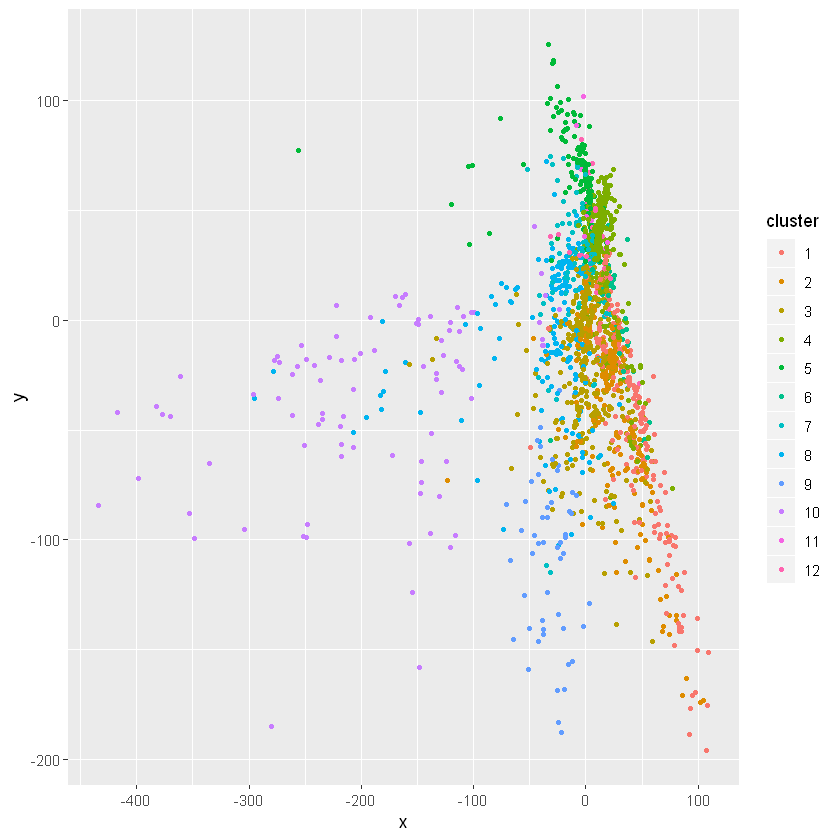

In [15]:
cluster <- cutree(h, k=12)
xy <- data.frame(cmdscale(d), factor(cluster))
names(xy) <- c("x", "y", "cluster")
xy$model <- rownames(xy)

ggplot(xy, aes(x, y)) + geom_point(aes(colour=cluster), size=1)

In [16]:
#xy
#reord <- merge(xy, msef, by = rownames)
msef <- merge(msef, xy, by = "model")
write.table(msef, file = "AllProjects_msef_clusteringOrd.txt", sep = "\t", row.names=F)